In [471]:
import pandas as pd
import numpy as np

In [472]:
df = pd.read_csv(r'Dataset.csv')

In [473]:
df.sample(5)

,Fabrication method,Zn wt%,Li wt%,Mg wt%,Ca wt%,Ce wt%,Yb wt%,Mn wt%,Al wt%,Cu wt%,...,e-CuZN5,ScZn12,MgZn2,ZrZn22,SrZn13,FeZn13,UTS (Mpa),Elongation (%),Corrosion rate (mm/yr),Refereces
25,Casting + Rolling,96.42,0.4,0.0,0.0,0.0,0.0,0.0,0.0,3.00,...,1.0,1.0,0.0,0.0,0.0,0.0,337.00,39.80,0.073000,0
62,Casting,98.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.26,...,0.0,0.0,0.0,0.0,0.0,0.0,123.82,0.91,0.000043,0
8,Casting + Extrusion,99.50,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,156.96,35.25,0.052000,0
75,As-Cast,99.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,165.00,2.10,0.040000,14th review paper
85,Extrusion,96.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,...,0.0,0.0,0.0,0.0,0.0,1.0,284.00,32.70,0.064000,14th review paper


In [474]:
df = df.fillna(0)

In [475]:
df.shape

(89, 36)

In [476]:
df['Fabrication method'] = df['Fabrication method'].str.strip().str.lower()
df['Fabrication method'].unique()


array(['casting + extrusion', 'casting', 'casting + rolling',
       'stir casting', 'extrusion', 'as-cast'], dtype=object)

In [477]:
df.drop(columns=['Refereces'],inplace= True)

In [479]:
df_processed = pd.get_dummies(df, columns=['Fabrication method'], drop_first=True)

In [480]:
numerical_cols = ['Zn wt% ', 'Li wt%', 'Mg wt%', 'Ca wt%', 'Ce wt%', 'Yb wt%', 
                  'Mn wt%', 'Al wt%', 'Cu wt%', 'Sr wt%', 'Ti wt%', 'Mo wt%', 
                  'Sc wt%', 'Zr wt%','Fe wt%', 'UTS (Mpa)', 'Elongation (%)', 
                  'Corrosion rate (mm/yr)']

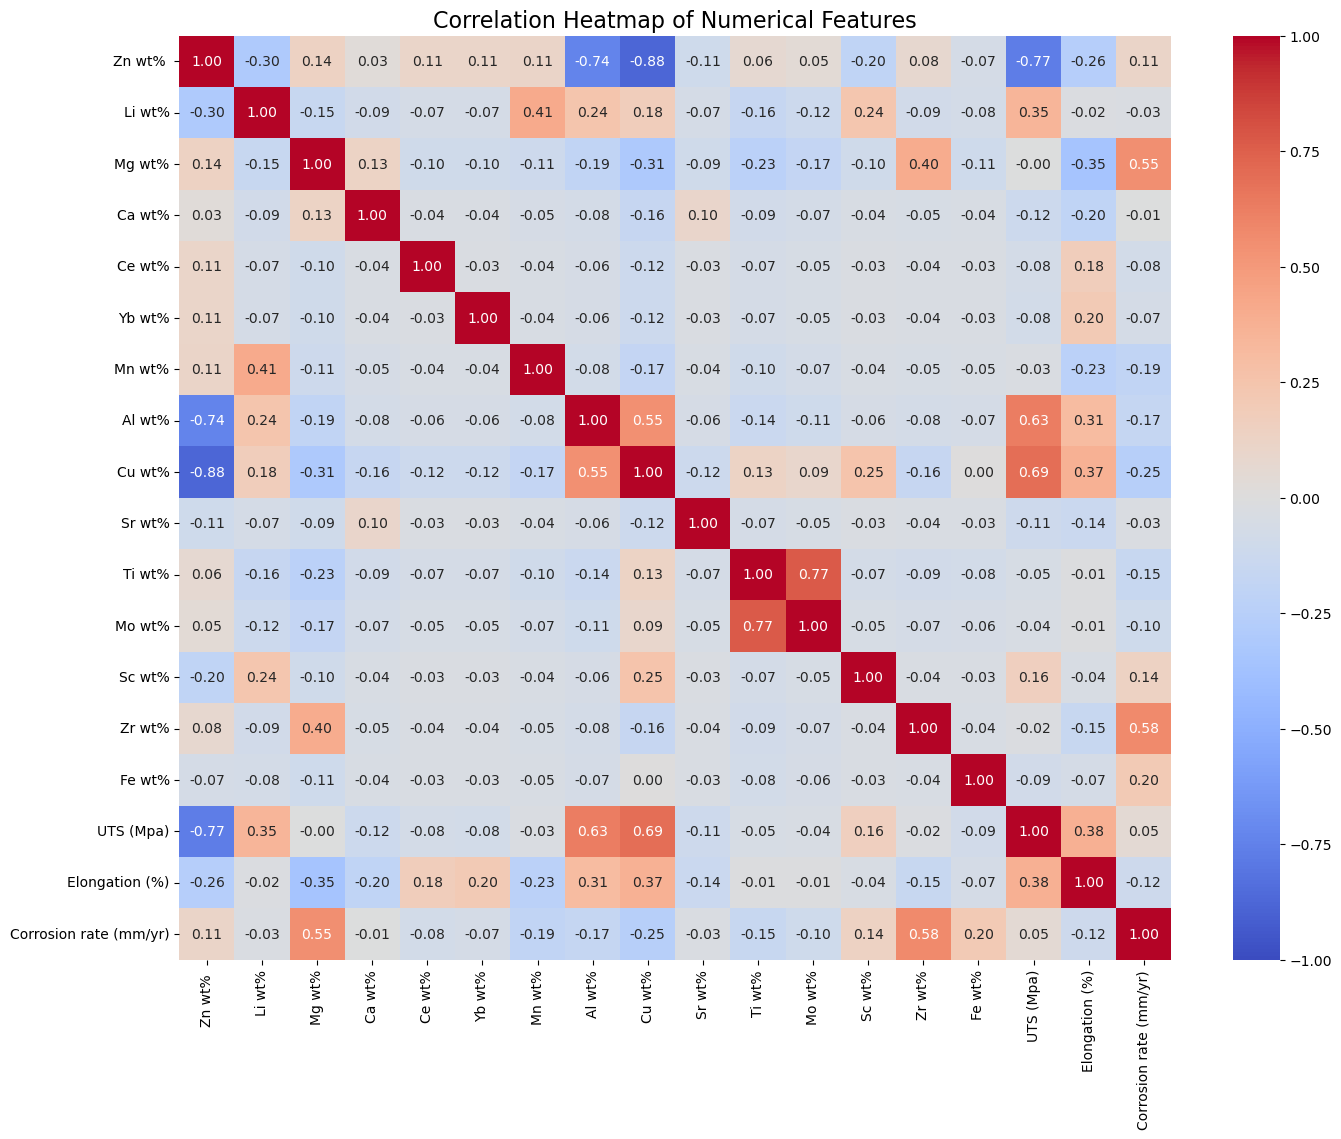

In [481]:
import matplotlib.pyplot as plt
import seaborn as  sns

plt.figure(figsize=(16, 12))
sns.heatmap(
    df[numerical_cols].corr(), 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm',
    vmin=-1, 
    vmax=1
)  
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [482]:
pairplot_cols = [ 
    'UTS (Mpa)', 
    'Elongation (%)',
    'Mg wt%',
    'Zn wt% ',
    'Cu wt%',
    'Corrosion rate (mm/yr)'
]

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


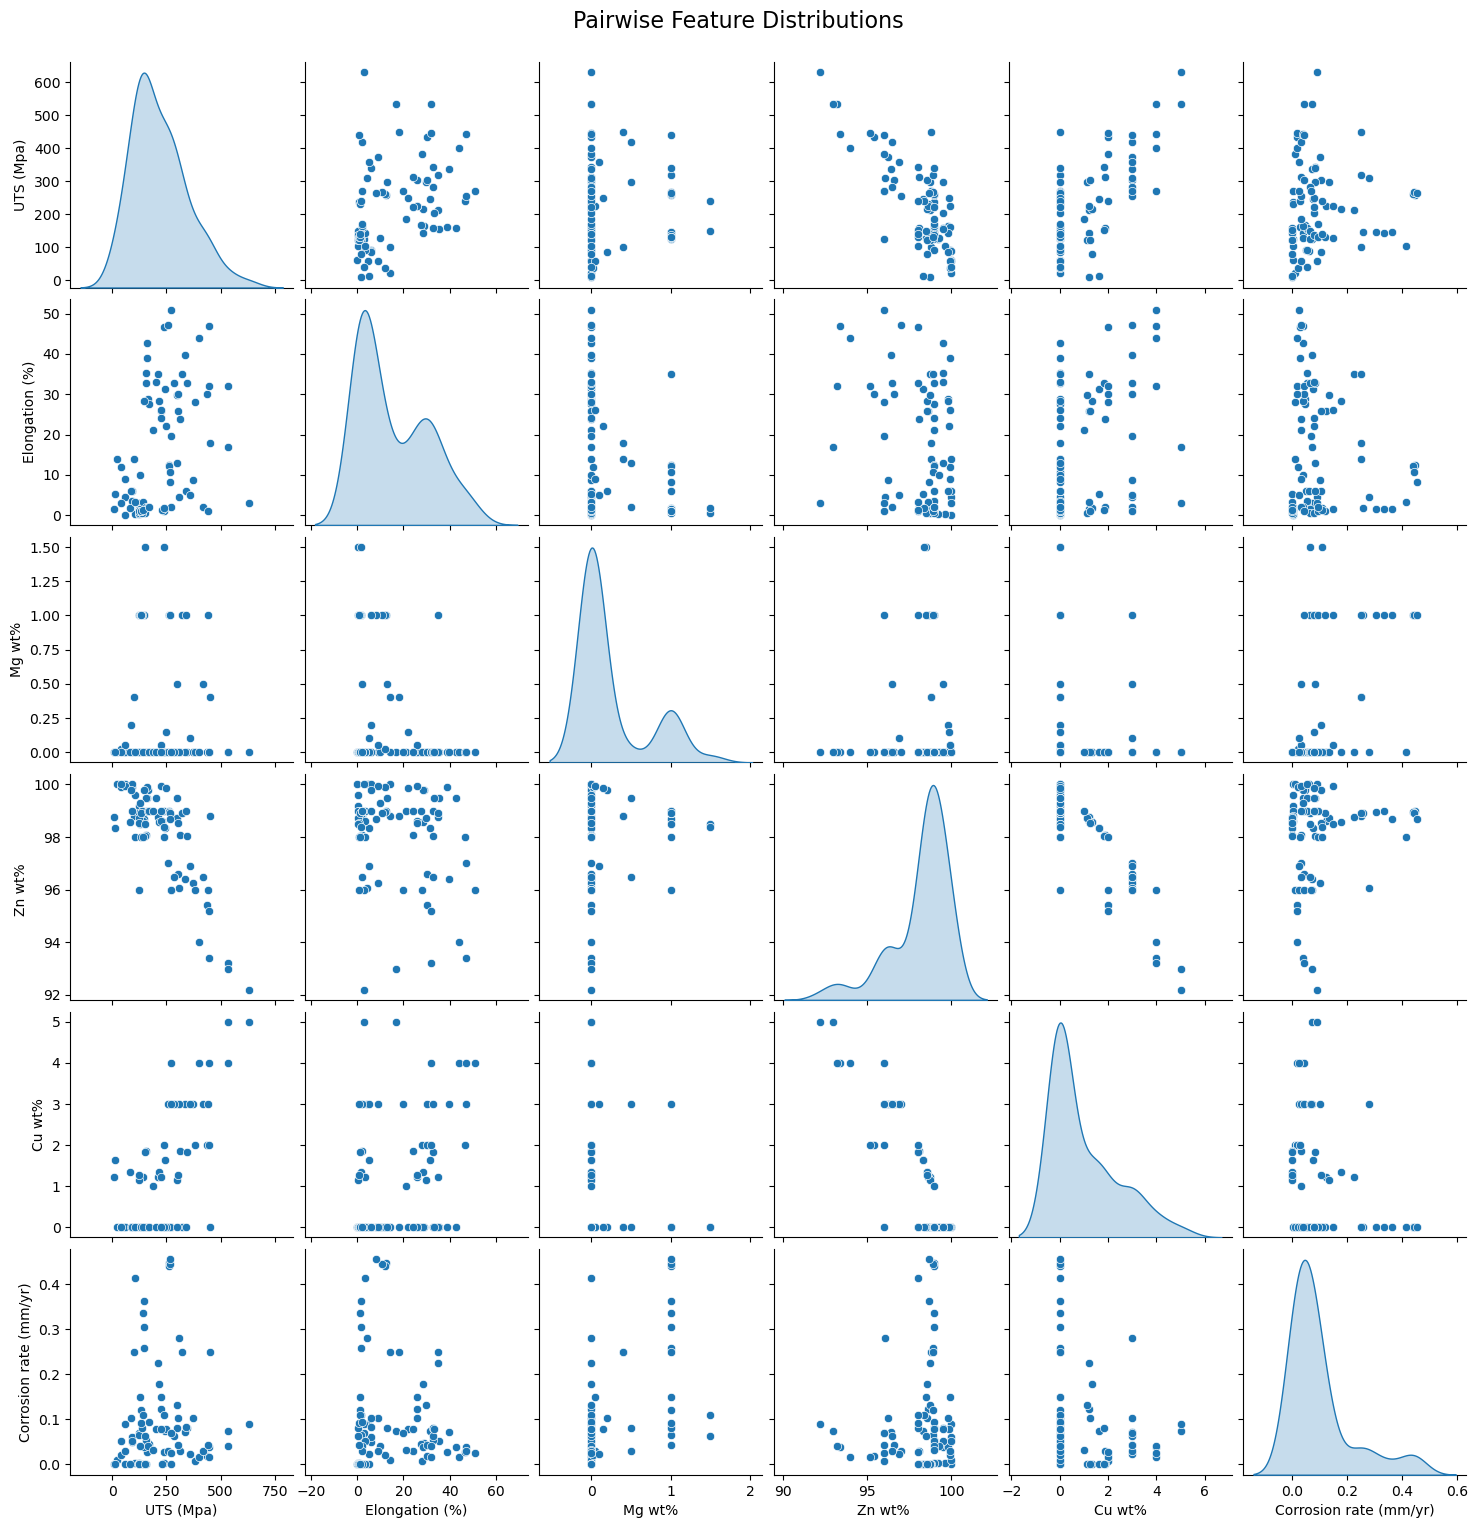

In [483]:
sns.pairplot(df[pairplot_cols], diag_kind='kde')
plt.suptitle('Pairwise Feature Distributions', y=1.02, fontsize=16)
plt.show()

In [484]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [485]:
df_processed.columns

Index(['Zn wt% ', 'Li wt%', 'Mg wt%', 'Ca wt%', 'Ce wt%', 'Yb wt%', 'Mn wt%',
       'Al wt%', 'Cu wt%', 'Sr wt%', 'Ti wt%', 'Mo wt%', 'Sc wt%', 'Zr wt%',
       'Fe wt%', 'alpha-Zn', 'beta-LiZn4', 'Mg2Zn11', 'CaZn13', 'CeZn11',
       'YbZn11', 'MnZn13', 'TiZn15', 'CuZn4', 'MoZn7', 'e-CuZN5', 'ScZn12',
       'MgZn2', 'ZrZn22', 'SrZn13', 'FeZn13', 'UTS (Mpa)', 'Elongation (%)',
       'Corrosion rate (mm/yr)', 'Fabrication method_casting',
       'Fabrication method_casting + extrusion',
       'Fabrication method_casting + rolling', 'Fabrication method_extrusion',
       'Fabrication method_stir casting'],
      dtype='object')

In [486]:
y = df_processed['Corrosion rate (mm/yr)']
X = df_processed.drop(columns=['Corrosion rate (mm/yr)'])

In [487]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [488]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [489]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

X_scaled['t-SNE1'] = X_tsne[:, 0]
X_scaled['t-SNE2'] = X_tsne[:, 1]

In [490]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
t_sne_clusters = kmeans.fit_predict(X_tsne)


c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


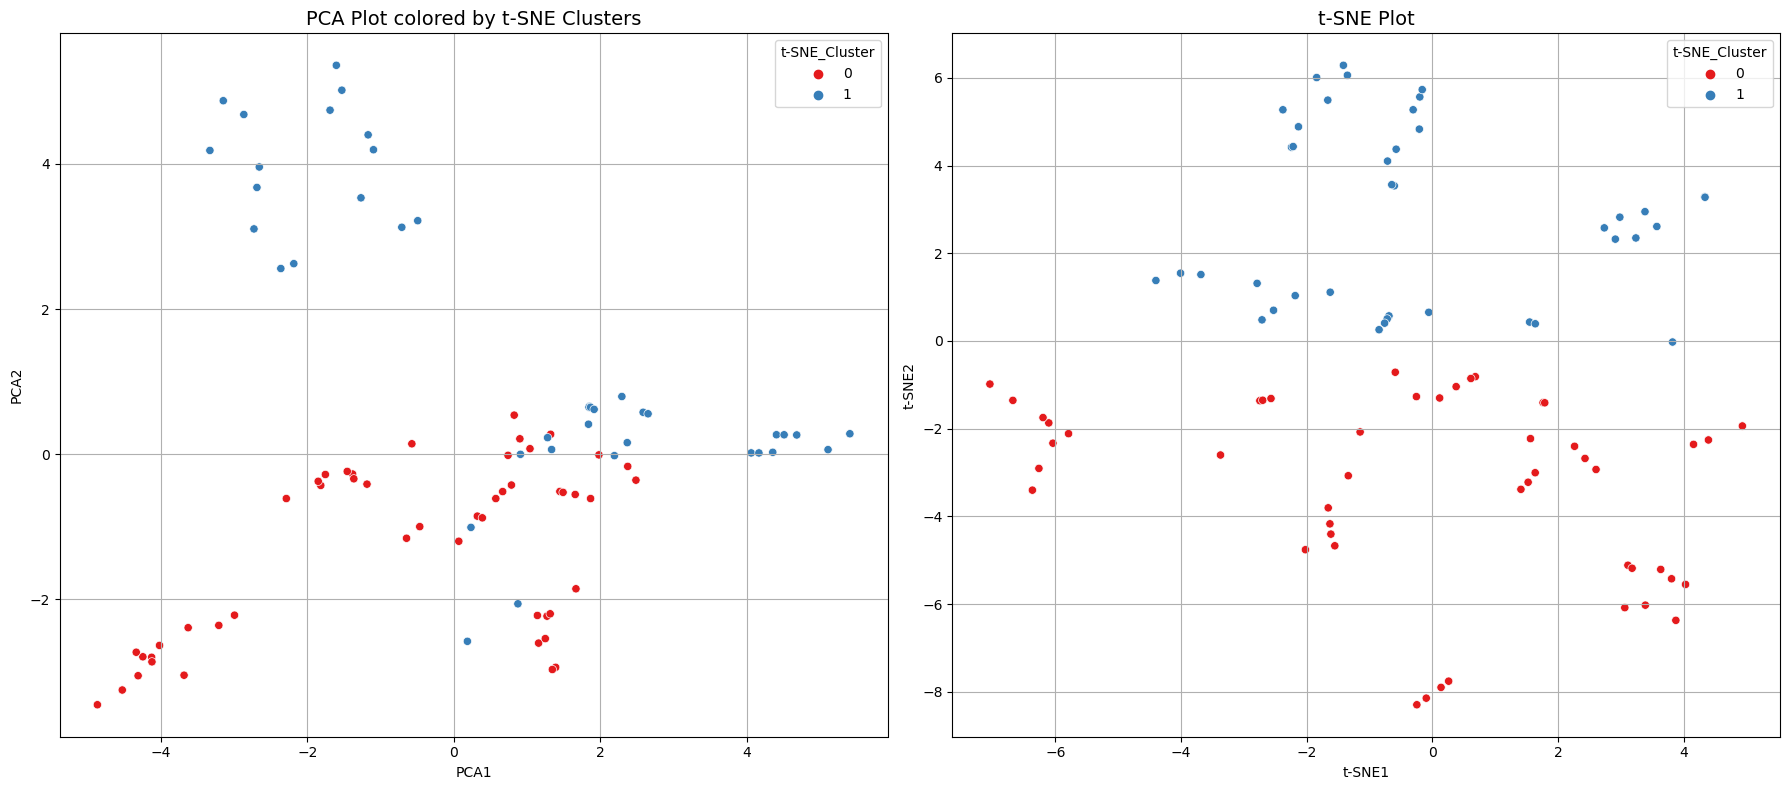

In [491]:
plot_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
plot_df['t-SNE1'] = X_tsne[:, 0]
plot_df['t-SNE2'] = X_tsne[:, 1]
plot_df['t-SNE_Cluster'] = t_sne_clusters

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
sns.scatterplot(
        data=plot_df, 
        x='PCA1', 
        y='PCA2', 
        hue='t-SNE_Cluster', 
        palette='Set1',  
        legend='full',
        ax=ax1
    )
ax1.set_title('PCA Plot colored by t-SNE Clusters', fontsize=14)
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.grid(True)

sns.scatterplot(
        data=plot_df, 
        x='t-SNE1', 
        y='t-SNE2', 
        hue='t-SNE_Cluster', 
        palette='Set1',
        legend='full',
        ax=ax2
    )
ax2.set_title('t-SNE Plot', fontsize=14)
ax2.set_xlabel('t-SNE1')
ax2.set_ylabel('t-SNE2')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [492]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_processed.apply(pd.to_numeric, errors='coerce').fillna(0)), 
    columns=df_processed.columns
)

features_scaled = df_scaled.drop('Corrosion rate (mm/yr)', axis=1)

In [493]:
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_tsne = tsne.fit_transform(features_scaled)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
t_sne_clusters = kmeans.fit_predict(X_tsne)

df_scaled['Cluster'] = t_sne_clusters

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


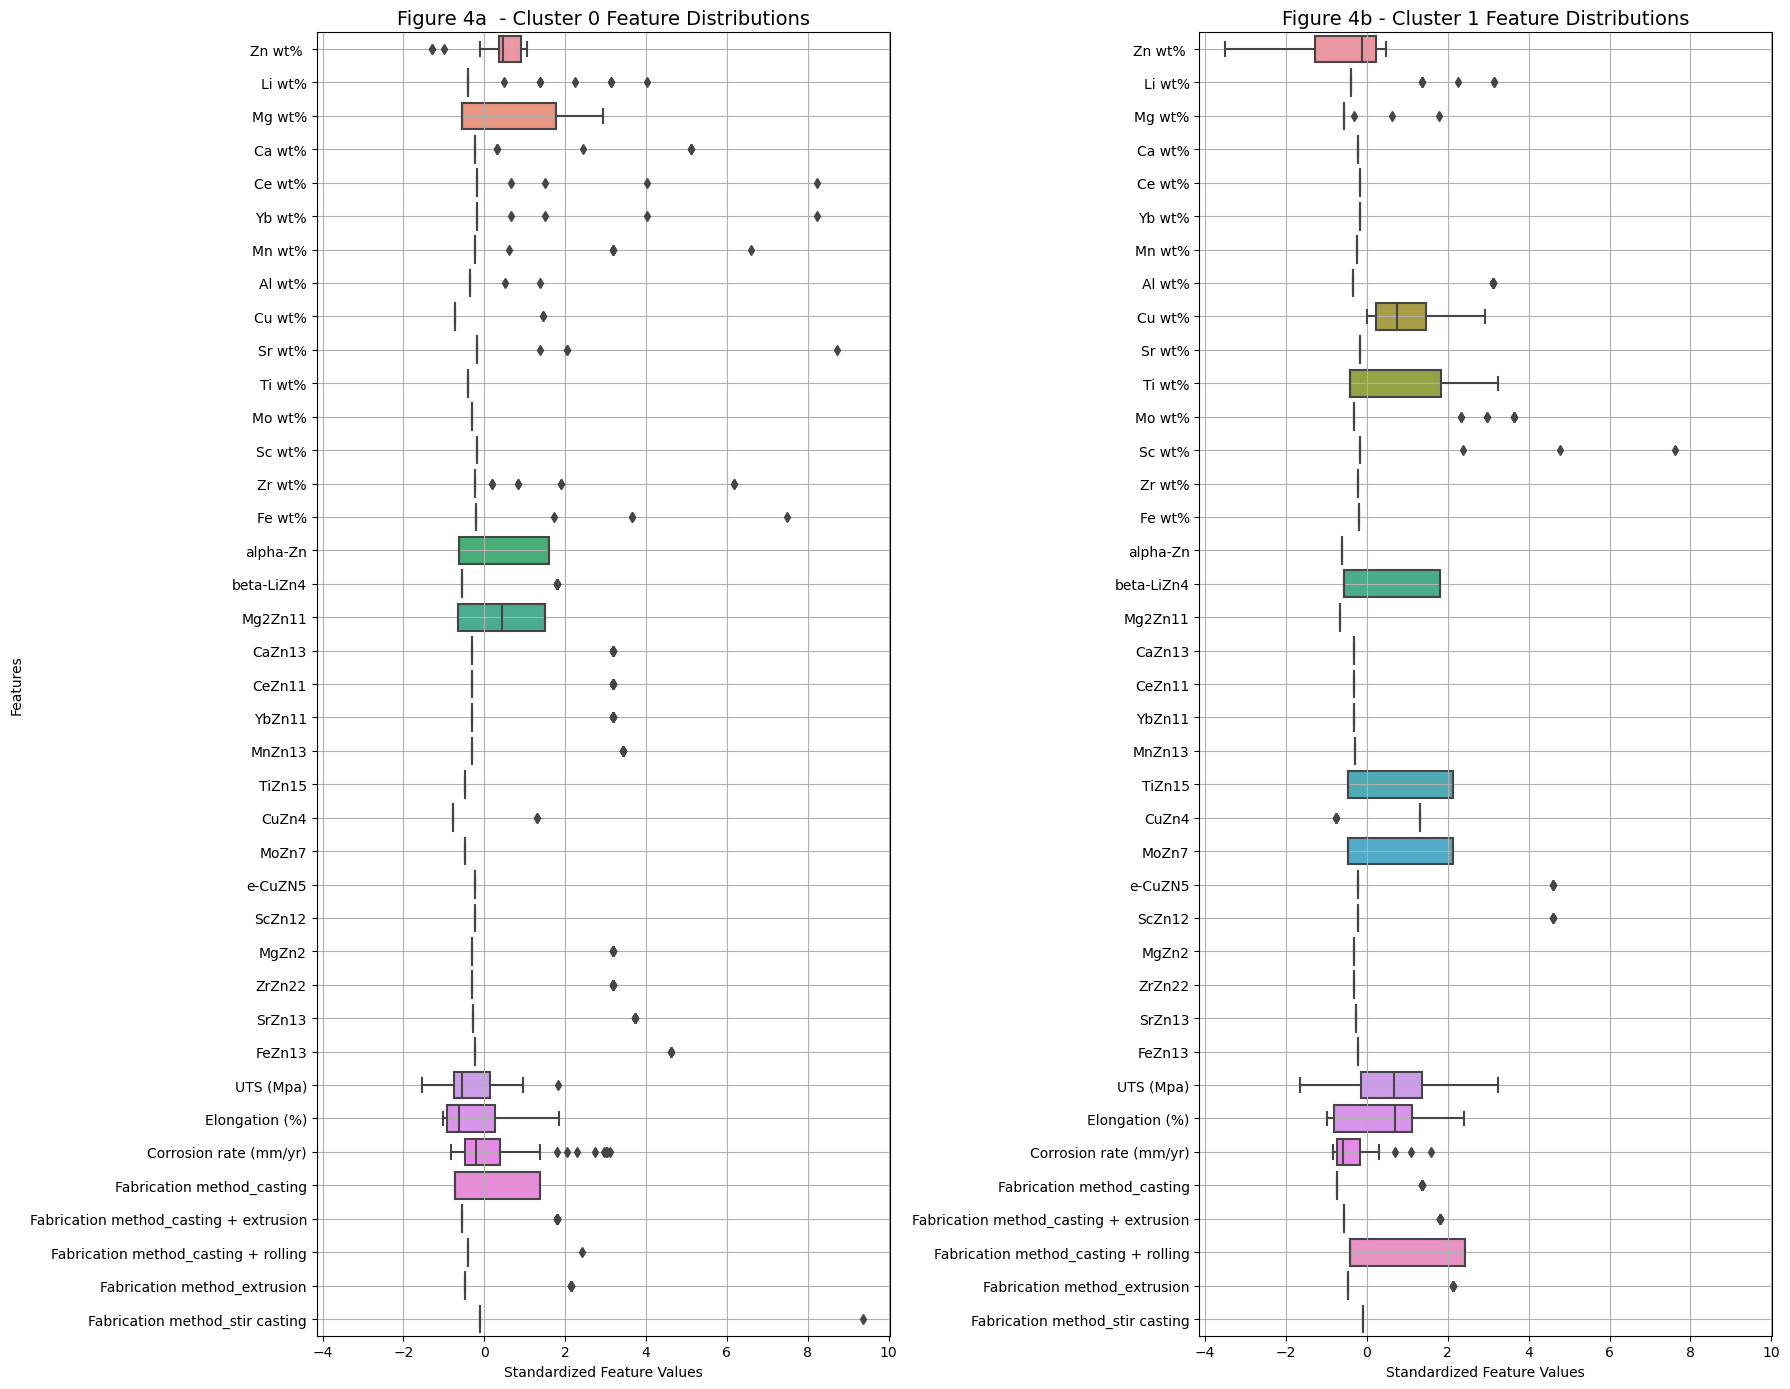

In [494]:
df_melted = df_scaled.melt(id_vars=['Cluster'], var_name='Feature', value_name='Standardized Value')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 14), sharex=True)

sns.boxplot(
    data=df_melted[df_melted['Cluster'] == 0],
    x='Standardized Value',
    y='Feature',
    ax=ax1,
    orient='h' 
)
ax1.set_title('Figure 4a  - Cluster 0 Feature Distributions', fontsize=14)
ax1.set_xlabel('Standardized Feature Values')
ax1.set_ylabel('Features')
ax1.grid(True)

sns.boxplot(
    data=df_melted[df_melted['Cluster'] == 1],
    x='Standardized Value',
    y='Feature',
    ax=ax2,
    orient='h'
)
ax2.set_title('Figure 4b - Cluster 1 Feature Distributions', fontsize=14)
ax2.set_xlabel('Standardized Feature Values')
ax2.set_ylabel('') 
ax2.grid(True)

plt.tight_layout()
plt.show()

In [495]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [496]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso

rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42) 
dt = DecisionTreeRegressor(random_state=42)
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'XGBoost': xgb, 'decision tree':dt}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=10, scoring='r2')
    print(f"{name}: Mean R^2 = {scores.mean():.4f} (Std: {scores.std():.4f})")

Random Forest: Mean R^2 = -2.4676 (Std: 4.2626)
Gradient Boosting: Mean R^2 = -3.1114 (Std: 5.6638)
XGBoost: Mean R^2 = -2.9313 (Std: 5.6879)
decision tree: Mean R^2 = -6.7409 (Std: 11.3201)


                         R2       MAE
Random Forest      0.868566  0.030171
Gradient Boosting  0.906224  0.025504
XGBoost            0.867757  0.025918
decision tree      0.769937  0.031489


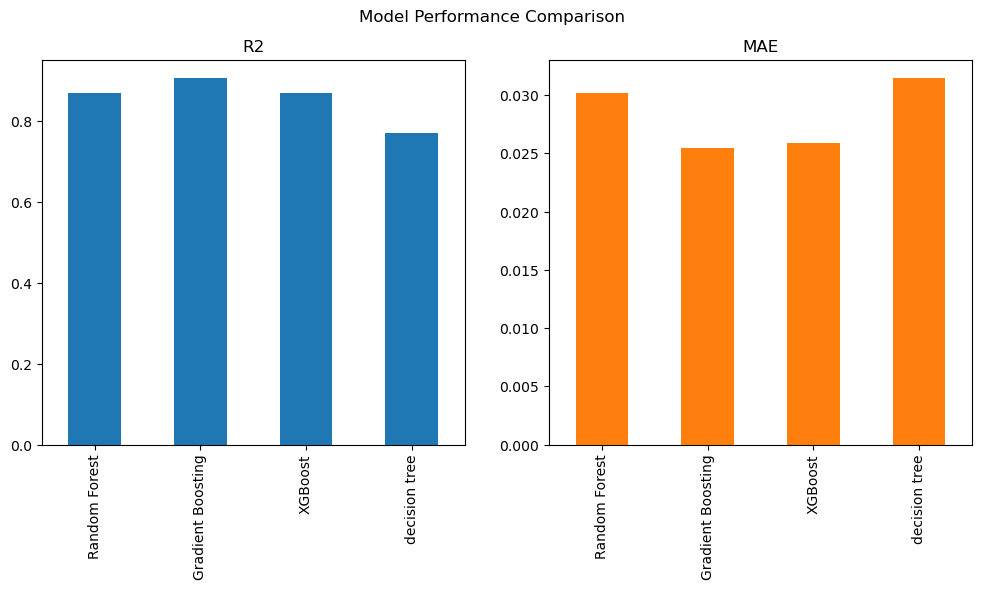

In [497]:
from sklearn.metrics import r2_score, mean_absolute_error

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {'R2': r2, 'MAE': mae,'y_pred':y_pred}

results_df = pd.DataFrame(results).T[['R2', 'MAE']]
print(pd.DataFrame(results).T[['R2','MAE']])

results_df.plot(kind='bar', subplots=True, layout=(1, 2), figsize=(12, 5), legend=False)
plt.suptitle("Model Performance Comparison")
plt.show()

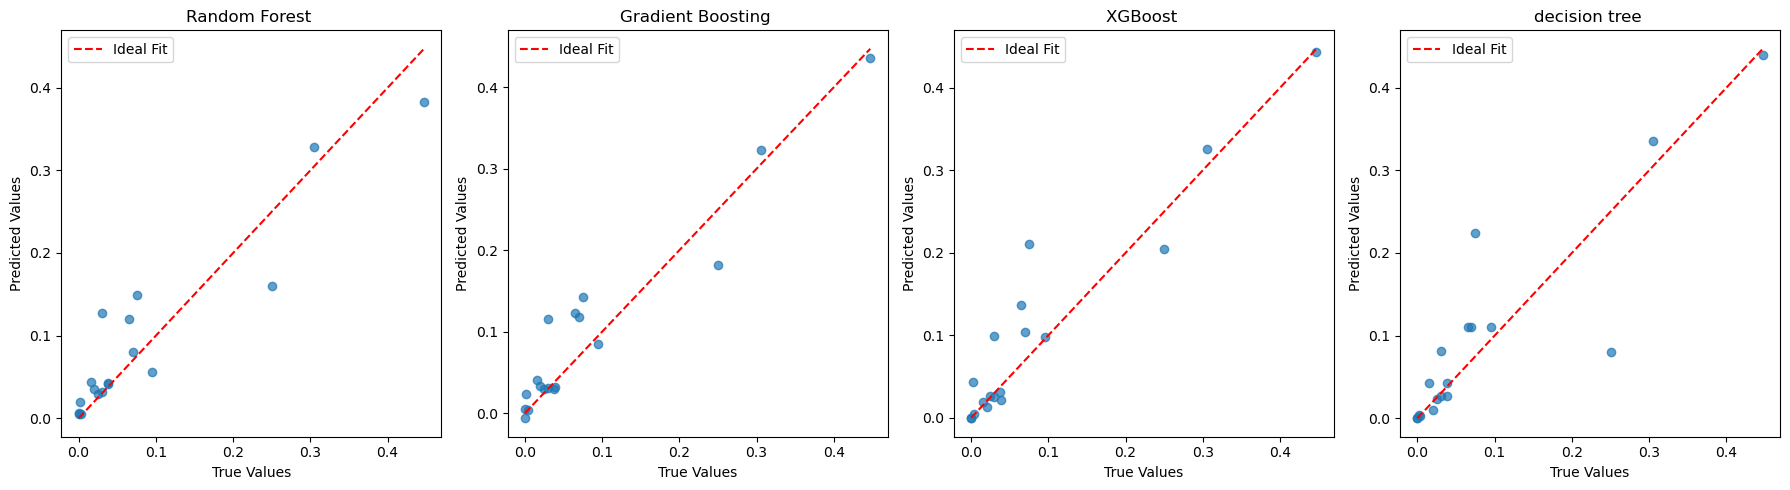

In [498]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for i, (name, res) in enumerate(results.items()):
    ax = axes[i]
    ax.scatter(y_test, res['y_pred'], alpha=0.7)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"{name} ")
    ax.legend()

plt.tight_layout()
plt.show()